# Thermal Conduction Suppression via Field Fluctuations
See papers by Bian et al., 2016-17

In [4]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from synthesizAR.util import InputHandler,OutputHandler

%matplotlib inline

In [5]:
def simulate_loop(lambda_turbulent,force_single_fluid=False,magnitude=0.1):
    # Configure
    config = InputHandler('/Users/willbarnes/Documents/work/codes/ebtelPlusPlus/config/ebtel.example.cfg.xml').lookup_vars()
    config['heating']['events'] = [
        {'event':{'rise_start':10,'rise_end':10,'decay_start':20,'decay_end':20,'magnitude':magnitude}},
    ]
    config['heating']['background'] = 1e-6
    config['heating']['partition'] = 1.
    config['loop_length'] = 10e8
    config['total_time'] = 1e4
    config['use_adaptive_solver'] = True
    config['adaptive_solver_error'] = 1e-8
    config['tau_max'] = 5
    config['use_flux_limiting'] = False
    config['c1_cond0'] = 6.
    config['force_single_fluid'] = force_single_fluid
    config['turbulent_mean_free_path'] = lambda_turbulent
    config['output_filename'] = 'ebtel_test'
    oh = OutputHandler(config['output_filename']+'.xml',config)
    oh.print_to_xml()
    # Run
    subprocess.check_output(['/Users/willbarnes/Documents/work/codes/ebtelPlusPlus/bin/ebtel++.run',
                             '-c','ebtel_test.xml'])
    # Load results
    results = np.loadtxt(config['output_filename'])
    t = results[:,0]
    Te = results[:,1]
    Ti = results[:,2]
    n = results[:,3]
    q = results[:,-1]
    return t,Te,Ti,n,q

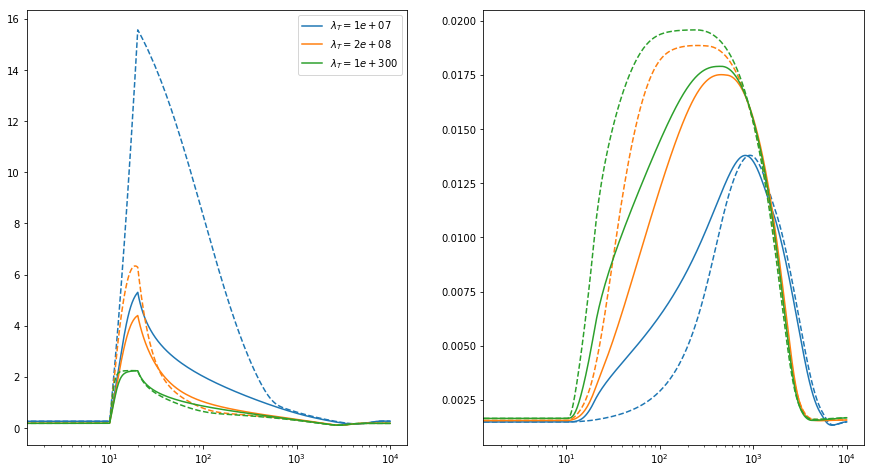

In [6]:
fig,axes=plt.subplots(1,2,sharex=True,figsize=(15,8))
for i,lt in enumerate(np.array([1e7,2e8,1e300])):
    mag = 5e-3
    t,Te,Ti,n,q = simulate_loop(lt,force_single_fluid=True,magnitude=mag)
    t_tf,Te_tf,Ti_tf,n_tf,q_tf = simulate_loop(lt,force_single_fluid=False,magnitude=mag)
    axes[0].plot(t,Te/1e6,label=r'$\lambda_T={:g}$'.format(lt),color=f'C{i}')
    axes[0].plot(t_tf,Te_tf/1e6,ls='--',color=f'C{i}')
    #axes[0].plot(t_tf,Ti_tf/1e6,ls=':',color=f'C{i}')
    axes[1].plot(t,n/1e10,color=f'C{i}')
    axes[1].plot(t_tf,n_tf/1e10,ls='--',color=f'C{i}')
axes[0].legend(loc='best')
#axes[0].axhline(y=15,color='k',ls=':')
#axes[0].axhline(y=10,color='k',ls=':')
#axes[0].axvline(x=2e2,color='k',ls=':')
#axes[0].set_xlim(5e-1,5e3)
#axes[0].set_ylim(0.1,2000)
axes[0].set_xscale('log')
#axes[0].set_yscale('log')